In [4]:
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv('creditcard.csv')

In [6]:
data.shape

(284807, 31)

In [7]:
pd.options.display.max_columns = None

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [10]:
data = data.drop(['Time'], axis = 1)

In [11]:
data = data.drop_duplicates()

In [12]:
X = data.drop(['Class'], axis = 1)
y = data['Class']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [15]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [16]:
normal.shape

(275190, 30)

In [17]:
fraud.shape

(473, 30)

In [18]:
normal_sample = normal.sample(n=473)

In [19]:
normal_sample.shape

(473, 30)

In [20]:
new_data = pd.concat([normal_sample,fraud])

In [21]:
new_data.shape

(946, 30)

In [26]:
X = new_data.drop(['Class'],axis = 1)
y = new_data['Class']

In [27]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [32]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [33]:
y_pred1 = log.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred1)

0.8210526315789474

In [35]:
precision_score(y_test,y_pred1)

1.0

In [36]:
recall_score(y_test,y_pred1)

0.6666666666666666

In [37]:
f1_score(y_test,y_pred1)

0.8

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred2 = dt.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred2)

0.8789473684210526

In [41]:
precision_score(y_test,y_pred2)

0.883495145631068

In [42]:
recall_score(y_test,y_pred2)

0.8921568627450981

In [43]:
f1_score(y_test,y_pred2)

0.8878048780487806

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred3 = rf.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred3)

0.9526315789473684

In [47]:
precision_score(y_test,y_pred3)

0.9894736842105263

In [48]:
recall_score(y_test,y_pred3)

0.9215686274509803

In [49]:
f1_score(y_test,y_pred3)

0.9543147208121827

In [72]:
final_data = pd.DataFrame({'':['Accuracy Score','Precision Score','Recall Score', 'F1 Score'],
                           'Logistic Regression':[accuracy_score(y_test,y_pred1)*100,
                                            precision_score(y_test,y_pred1)*100,
                                            recall_score(y_test,y_pred1)*100,
                                            f1_score(y_test,y_pred1)*100],
                          'Decision Tree':[accuracy_score(y_test,y_pred2)*100,
                                            precision_score(y_test,y_pred2)*100,
                                            recall_score(y_test,y_pred2)*100,
                                            f1_score(y_test,y_pred2)*100],
                          'Random Forest':[accuracy_score(y_test,y_pred3)*100,
                                            precision_score(y_test,y_pred3)*100,
                                            recall_score(y_test,y_pred3)*100,
                                            f1_score(y_test,y_pred3)*100]})

In [73]:
print(final_data)

                    Logistic Regression  Decision Tree  Random Forest
0   Accuracy Score            82.105263      87.894737      95.263158
1  Precision Score           100.000000      88.349515      98.947368
2     Recall Score            66.666667      89.215686      92.156863
3         F1 Score            80.000000      88.780488      95.431472


C:\Users\OLUSOLADE EMMANUEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Logistic Regression'>

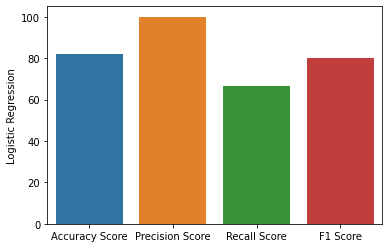

In [79]:
sns.barplot(final_data[''],final_data['Logistic Regression'] )

In [96]:
final_data2 = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],
                           'Accuracy Score':[accuracy_score(y_test,y_pred1)*100,
                                            accuracy_score(y_test,y_pred2)*100,
                                            accuracy_score(y_test,y_pred3)*100],
                          'Precision Score':[precision_score(y_test,y_pred1)*100,
                                            precision_score(y_test,y_pred2)*100,
                                            precision_score(y_test,y_pred3)*100],
                          'Recall Score':[recall_score(y_test,y_pred1)*100,
                                            recall_score(y_test,y_pred2)*100,
                                            recall_score(y_test,y_pred3)*100],
                          'F1 Score':[f1_score(y_test,y_pred1)*100,
                                            f1_score(y_test,y_pred2)*100,
                                            f1_score(y_test,y_pred3)*100]})

In [97]:
print(final_data2)

                 Model  Accuracy Score  Precision Score  Recall Score  \
0  Logistic Regression       82.105263       100.000000     66.666667   
1        Decision Tree       87.894737        88.349515     89.215686   
2        Random Forest       95.263158        98.947368     92.156863   

    F1 Score  
0  80.000000  
1  88.780488  
2  95.431472  


C:\Users\OLUSOLADE EMMANUEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='Accuracy Score'>

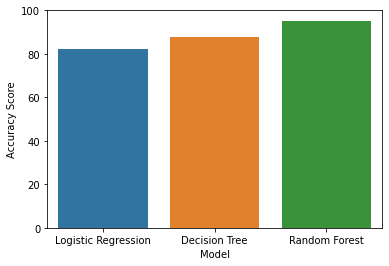

In [98]:
sns.barplot(final_data2['Model'], final_data2['Accuracy Score'])